Laboratorio N°01 - PSeI

---



INTEGRANTES:

  - Romero Zavaleta, Joshep Andrés
  - Rodríguez Alva, Luis fernando
  - Moreno Lozada, Sofía

In [ ]:
!wget -nc https://vvestman.github.io/summerschool19/sounds/Im_Superman.wav

!pip install pysoundfile
!pip install bitstring

--2023-09-11 04:21:23--  https://vvestman.github.io/summerschool19/sounds/Im_Superman.wav
Resolving vvestman.github.io (vvestman.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to vvestman.github.io (vvestman.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 823996 (805K) [audio/wav]
Saving to: ‘Im_Superman.wav’

Im_Superman.wav     100%[===================>] 804.68K  --.-KB/s    in 0.05s   

2023-09-11 04:21:23 (14.8 MB/s) - ‘Im_Superman.wav’ saved [823996/823996]



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 7.5 MB/s eta 0:00:00


IMPORTAMOS LAS LIBRERIAS NECESARIAS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")
from IPython.lib.display import Audio
import soundfile
import matplotlib.pyplot as plt
import IPython
IPython.display. Audio ("Im_Superman.wav")

HACEMOS LA LECTURA DE AUDIO

Tasa de muestreo: 44100 muestras/segundo
Tamaño de señal: 411889 muestras
Duración: 9.339886621315193 segundos


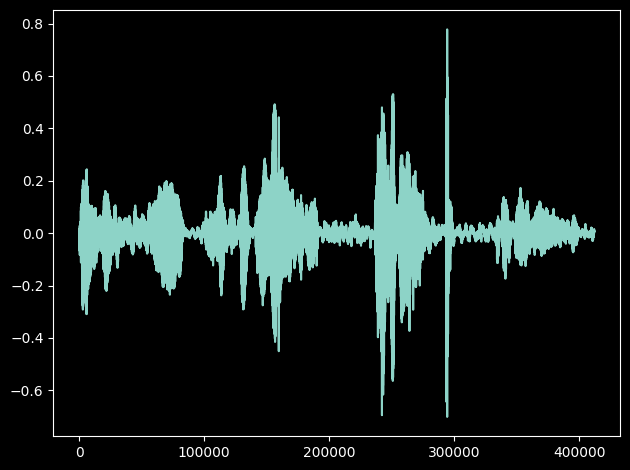

In [ ]:
audio_senial, sampling_rate = soundfile.read("Im_Superman.wav")

type (audio_senial)

print('Tasa de muestreo: {} muestras/segundo'.format(sampling_rate))
print('Tamaño de señal: {} muestras'.format(audio_senial.shape[0]))
print('Duración: {} segundos'.format(audio_senial.shape[0]/sampling_rate))
plt.plot(audio_senial)
plt.tight_layout()

plt.show()

GENERAMOS NUESTRA SEÑAL

In [ ]:
fm = sampling_rate #Frecuencia de muestreo
t = np.arange(0, len(audio_senial))/fm #Vector tiempo
n = len(t) #Longitud total de señal
#p = 20 #Longitud máxima de la señal a generar
#amplitud_ruido = 5 #Escalamiento del ruido a generar

amplitud = audio_senial #Señal generada
#ruido = amplitud * np.random.randn(n)

senial_ruidosa = amplitud #+ ruido

print(n)
print(fm)

411889
44100


SEÑAL GENERADA

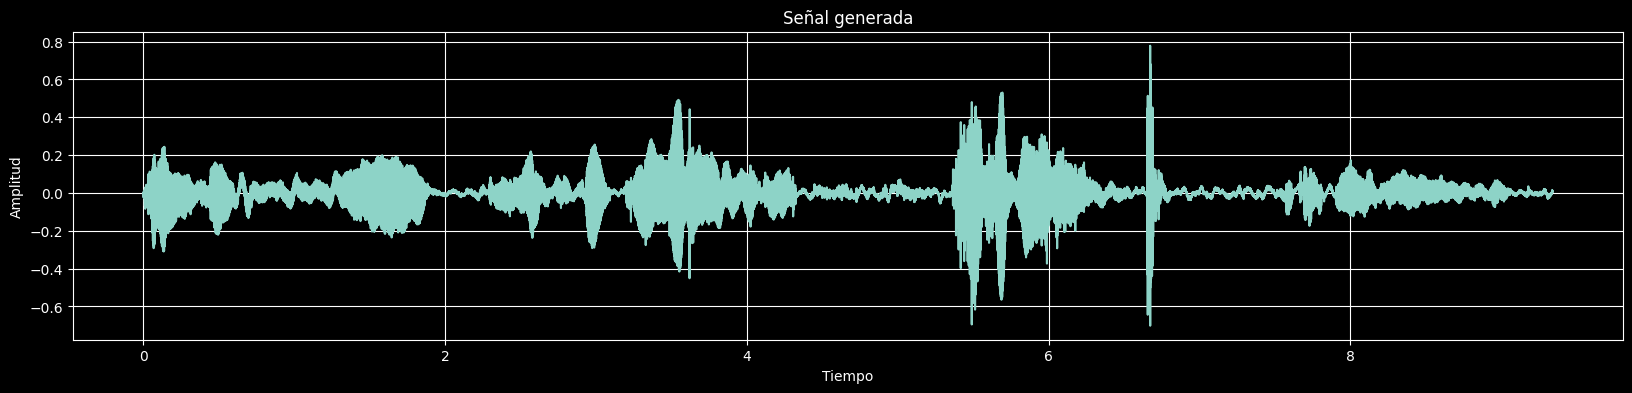

In [ ]:
plt.subplots(1,1, figsize=(20,4))

plt.subplot(111)
plt.plot(t,amplitud)
plt.title("Señal generada")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()

plt.show()

APLICACION FILTRO MEDIA MOVIL

4.603174603174603


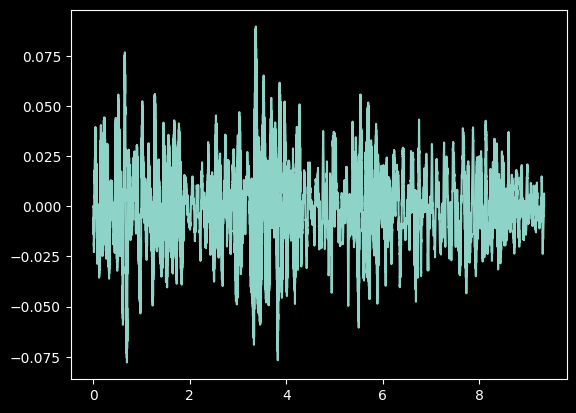

In [ ]:
k = 101
senial_filtrada = np.zeros_like(senial_ruidosa)

for i in range(k,n-k+1):
  senial_filtrada[i] = np.mean(senial_ruidosa[i-k : i+k])
plt.plot(t,senial_filtrada)

tamanio_ventana = 1000*((2*k+1)/fm)
print(tamanio_ventana)

plt.show()

GRAFICAMOS LA SEÑAL CON FILTRO MEDIA MOVIL

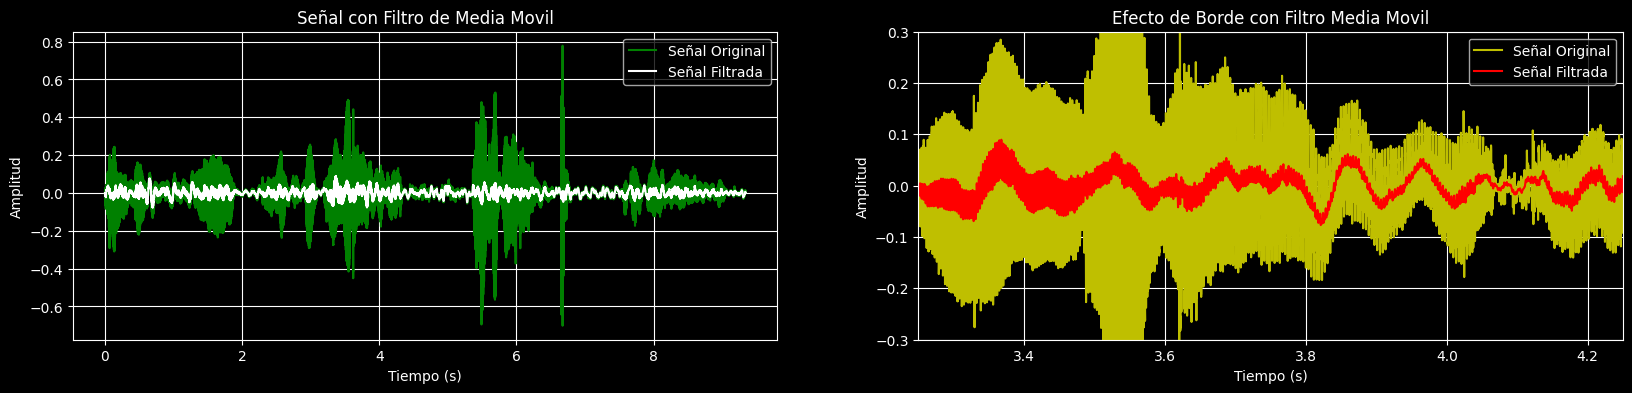

In [ ]:
plt.subplots(1,2,figsize=(20,4))
plt.subplot(121)
plt.plot(t,senial_ruidosa,"g",label="Señal Original")
plt.plot(t,senial_filtrada,"w",label="Señal Filtrada")
plt.grid(True)
plt.title("Señal con Filtro de Media Movil")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
###############################################################
plt.subplot(122)
plt.plot(t,amplitud,"y",label="Señal Original")
plt.plot(t,senial_filtrada,"r",label="Señal Filtrada")
plt.grid(True)
plt.title("Efecto de Borde con Filtro Media Movil")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.axis([3.25,4.25,-0.3,0.3])
plt.legend()
plt.show()

IMPLEMENTAMOS EL FILTRO GAUSSIANO

In [ ]:
FWHM = 40    #Establecemos un FWHM teórico de 30 ms
k = 100      #Valor para establecer el tamaño de la ventana gaussiana 2k
gt = 1000*np.arange(-k,k)/fm #Tiempo normalizado de función gaussiana en ms
filtro_gaussiano = np.exp(-(4*np.log(2)*gt**2)/(FWHM**2)) #Creación de filtro gaussiano
filtro_gaussiano_normalizado = filtro_gaussiano/np.sum(filtro_gaussiano)

#Cálculo empirico del tamaño de FWHM en ms
flanco_bajada = k+np.argmin((filtro_gaussiano[k:]-.5)**2)
flanco_subida = np.argmin((filtro_gaussiano-.5)**2)
FWHM_obtenido = gt[flanco_subida]-gt[flanco_bajada] #Duración del FWHM en ms

PLOTEAMOS EL FILTRO GAUSSIANO

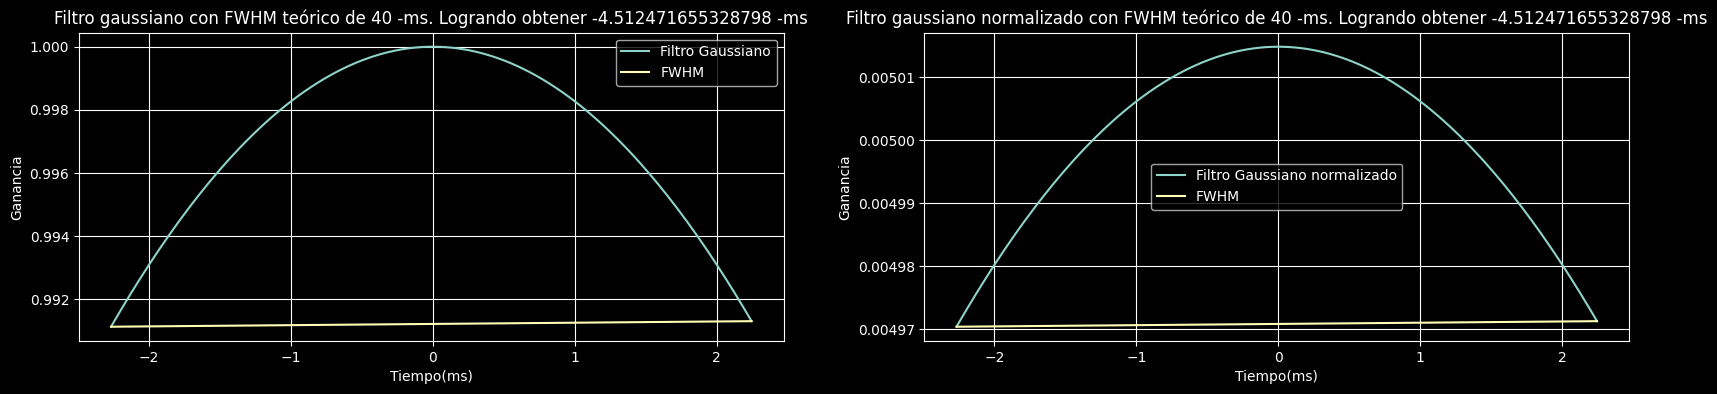

In [ ]:
plt.subplots(1,2, figsize=(20,4))
plt.subplot(121)
plt.plot(gt,filtro_gaussiano,label="Filtro Gaussiano") #Gráfica construida
plt.plot([gt[flanco_subida],gt[flanco_bajada]],
         [filtro_gaussiano[flanco_subida],filtro_gaussiano[flanco_bajada]],
         label="FWHM") #Gráfica linea FWHM
plt.title(f"Filtro gaussiano con FWHM teórico de {FWHM} -ms. Logrando obtener {FWHM_obtenido} -ms")
plt.xlabel('Tiempo(ms)')
plt.ylabel('Ganancia')
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(gt,filtro_gaussiano_normalizado,label="Filtro Gaussiano normalizado") #Gráfica construida
plt.plot([gt[flanco_subida],gt[flanco_bajada]],
         [filtro_gaussiano_normalizado[flanco_subida],filtro_gaussiano_normalizado[flanco_bajada]],
         label="FWHM") #Gráfica linea FWHM
plt.title(f"Filtro gaussiano normalizado con FWHM teórico de {FWHM} -ms. Logrando obtener {FWHM_obtenido} -ms")
plt.xlabel('Tiempo(ms)')
plt.ylabel('Ganancia')
plt.grid()
plt.legend()

plt.show()

APLICACION DEL FILTRO GAUSSIANO

In [ ]:
senial_filtrada_gaussiana = np.zeros_like(senial_ruidosa)

for i in range(k,n-k+1):
  senial_filtrada_gaussiana[i] = np.sum(senial_ruidosa[i-k:i+k]*filtro_gaussiano_normalizado)  #Ponderación de salidas

GRAFICAMOS LA SEÑAL CON EL FILTRO GAUSSIANO

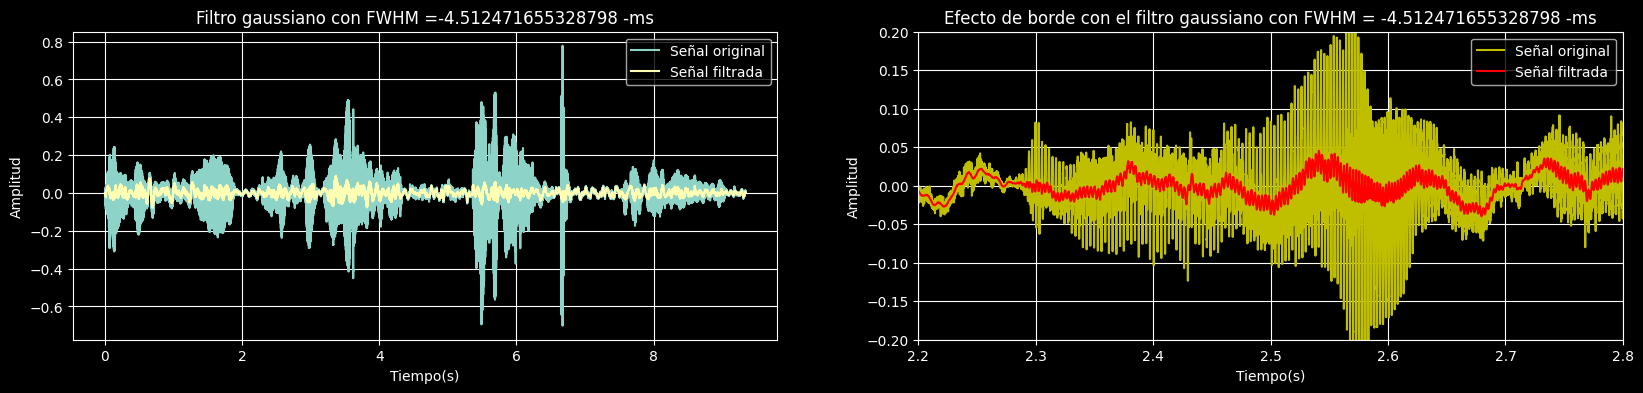

In [ ]:
plt.subplots(1,2, figsize=(20,4))

plt.subplot(121)
plt.plot(t, senial_ruidosa, label="Señal original")
plt.plot(t,senial_filtrada_gaussiana, label="Señal filtrada")
plt.title(f"Filtro gaussiano con FWHM ={FWHM_obtenido} -ms")
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(t, amplitud, "y", label = "Señal original")
plt.plot(t,senial_filtrada_gaussiana,"r", label="Señal filtrada")
plt.title(f"Efecto de borde con el filtro gaussiano con FWHM = {FWHM_obtenido} -ms")
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.axis([2.2, 2.8, -0.2, 0.2])
plt.grid()
plt.legend()

plt.show()

COMPARACION DE AMBOS FILTROS

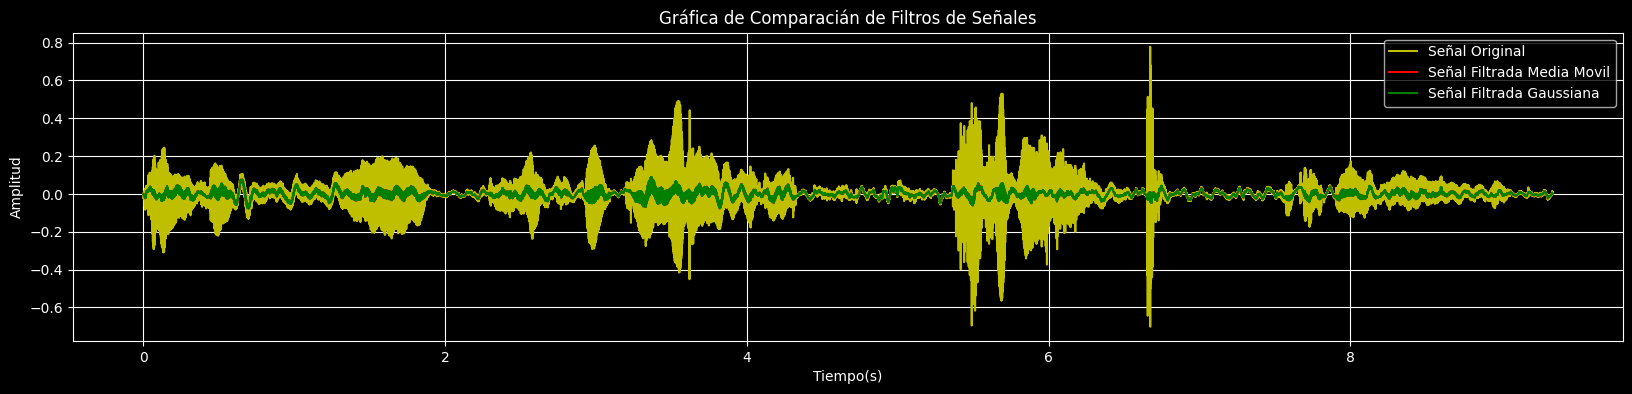

In [ ]:
plt.subplots(figsize=(20,4))

plt.plot(t, senial_ruidosa,"y", label="Señal Original")
plt.plot(t,senial_filtrada,"r",label="Señal Filtrada Media Movil")
plt.plot(t,senial_filtrada_gaussiana,"g", label="Señal Filtrada Gaussiana")
plt.title("Gráfica de Comparacián de Filtros de Señales")
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()
plt.show()

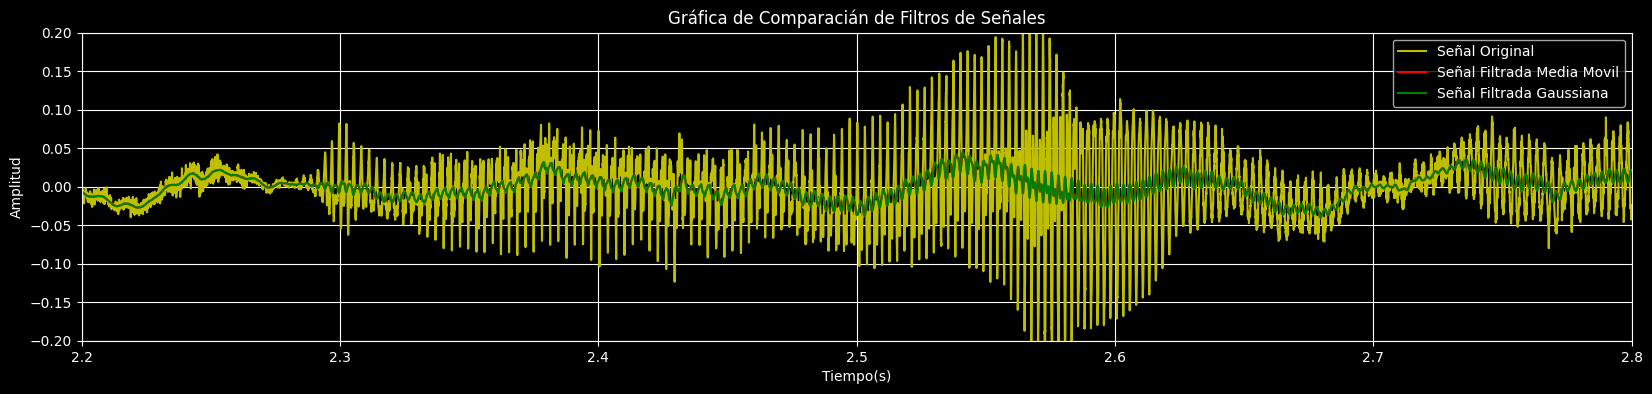

In [ ]:
plt.subplots(figsize=(20,4))

plt.plot(t, senial_ruidosa,"y", label="Señal Original")
plt.plot(t,senial_filtrada,"r",label="Señal Filtrada Media Movil")
plt.plot(t,senial_filtrada_gaussiana,"g", label="Señal Filtrada Gaussiana")
plt.title("Gráfica de Comparacián de Filtros de Señales")
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.axis([2.2, 2.8, -0.2, 0.2])
plt.grid()
plt.legend()
plt.show()

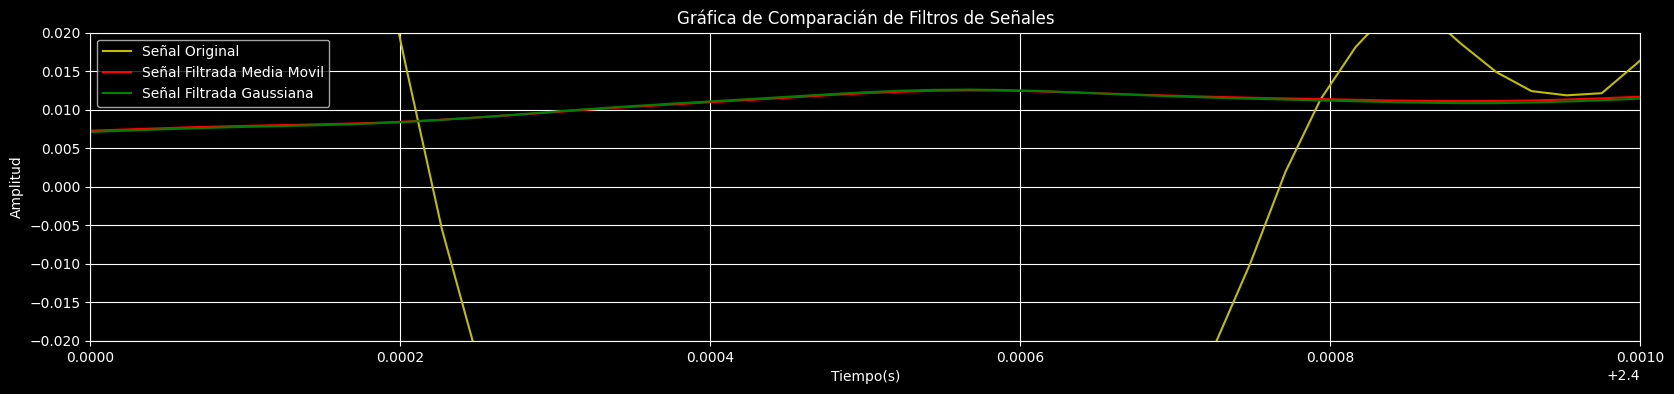

In [ ]:
plt.subplots(figsize=(20,4))

plt.plot(t, senial_ruidosa,"y", label="Señal Original")
plt.plot(t,senial_filtrada,"r",label="Señal Filtrada Media Movil")
plt.plot(t,senial_filtrada_gaussiana,"g", label="Señal Filtrada Gaussiana")
plt.title("Gráfica de Comparacián de Filtros de Señales")
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.axis([2.4, 2.401, -0.02, 0.02])
plt.grid()
plt.legend()
plt.show()

NUEVO AUDIO CON FILTRO MEDIA MOVIL

In [ ]:
Audio(senial_filtrada, rate = fm)

NUEVO AUDIO CON FILTRO GAUSSIANO

In [ ]:
Audio(senial_filtrada_gaussiana, rate = fm)

¿Que efecto sonoro identifica entre el audio original y el modificado?
- Se puede apreciar que en el audio original el sonido es más grabe y se puede apreciar el ruido del mismo, mientras que para el audio con filtro el sonido es más tenue y suave debido a que el ruido ya no esta presente.

**TEST DE COMPROBACION:**

	¿Cuál es la diferencia entre una señal estocástica de una señal determinística? Explique.
Para Haykin & Veen (1995) una señal estocástica se genera de un proceso físico intrínsecamente aleatorio, por lo que cuenta con apariencia aleatoria de sus formas de onda. Por su parte la señal determinística no cuenta con incertidumbre en su valor en el tiempo.
Para comprender su naturaleza podemos utilizar los siguientes ejemplos, la señal determinística puede ser una señal sinusoidal simple cuya forma y frecuencia son constantes y predecibles en todo momento, una señal estocástica es el ruido ambiental capturado por un micrófono ya que su valor en un momento dado varía aleatoriamente debido a la influencia de múltiples fuentes y perturbaciones externas.

	¿Qué es la tasa de muestreo de la señal? Explique.
La tasa de muestreo es la cantidad de muestras tomadas por segundo de una señal analógica continua para convertirla en una señal digital discreta. Para tomarlas se aplica el teorema del muestreo de Nyquist-Shannon.

	¿El filtro media móvil implementado es causal? Explique.
Un filtro media móvil de orden uno se calcula con:

\begin{equation}
y(n) = \frac{1}{N} \sum_{k=0}^{N-1} x(n-k)
\end{equation}

Donde:

- y(n):salida en el momento n.

- x(n):entrada en el momento n.

promediando las N últimas muestras, al depender solo de las muestras pasadas y actual, se concluye que el filtro media móvil en su forma más simple es causal.

**BIBLIOGRAFÍA**

- Haykin S. & Veen B. V. (1995). Señales y sistemas. LIMUSA WILEY.